## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [122]:
def identity_basis(x, feature_num=None):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    x = np.expand_dims(x, axis=1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    print(ret.shape)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [131]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    # 基函数
    feature_num = 1
    basis_func = identity_basis

    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train, feature_num)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    # 最小二乘法
    # w = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, y_train))
    # 梯度下降
    learning_rate = 1e-2
    epoch_num = 100
    w = np.random.random_sample((phi.shape[1], )) * 1e-10
    for step in range(epoch_num):
        loss = np.sqrt(np.mean(np.abs(y_train - np.dot(phi, w)) ** 2))
        if step % 10 == 0:
            print(f'step[{step + 1}/{epoch_num}] loss: {loss}')
        dw = np.dot(phi.T, (np.dot(phi, w) - y_train))/phi.shape[0]
        w += -dw * learning_rate
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x, feature_num)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
step[1/100] loss: 13.973072726738062
step[11/100] loss: 10.681933563324156
step[21/100] loss: 8.211577634291428
step[31/100] loss: 6.370445937349317
step[41/100] loss: 5.013877473081167
step[51/100] loss: 4.031712393838121
step[61/100] loss: 3.3381640179004672
step[71/100] loss: 2.863938672430675
step[81/100] loss: 2.5513248143015566
step[91/100] loss: 2.3525382657638256
训练集预测值与真实值的标准差：2.2
预测值与真实值的标准差：2.4


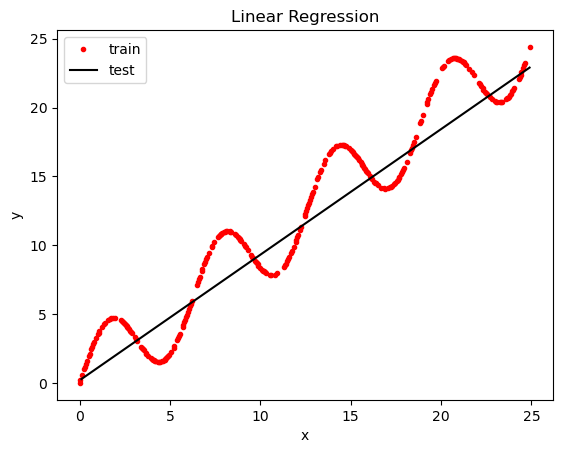

In [132]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()